# Question 1 - Apply KNN

Apply your algorithm by varying k from 1 to 20, and see the best suited k

In [2]:
# Read important libraries 
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Image libraries
import cv2
import glob

# Filter Warnings
import warnings
warnings.filterwarnings("ignore")

## Read the image data

Reading dog and cat images from individual folders because this will allow easier labelling of images. Finally I will make a feature dataframe with class labels and the feature columns

In [3]:
# col_dir = '../Datasets/train_set/Cat/Image*.*'

# #creating a collection with the available images
# col = imread_collection(col_dir)
# len(col)

In [4]:
%%time

# Read all the dog images
imdir = '../Datasets/train_set/Dog/'
ext = ['png', 'jpg', 'gif', 'jpeg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

dog_images = [cv2.imread(file) for file in files]
print("Number of Dog Images Collected", len(dog_images))

Number of Dog Images Collected 95
Wall time: 10.4 s


In [4]:
%%time

# Read all the dog images
imdir = '../Datasets/train_set/Cat/'
ext = ['png', 'jpg', 'gif', 'jpeg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

cat_images = [cv2.imread(file) for file in files]
print("Number of Cat Images Collected", len(cat_images))

Number of Cat Images Collected 95
Wall time: 4min 1s


## Data Preprocessing

I need to reshape the data and set the size.

In [5]:
%%time
# Resize size 
size = 32

# Resize dog image 
for i in range(len(dog_images)):
    dog_images[i] = cv2.resize(dog_images[i], dsize=(size, size))

    
# Resize cat image 
for j in range(len(cat_images)):
    cat_images[j] = cv2.resize(cat_images[j], dsize=(size, size))

Wall time: 5.31 s


## Feature Extraction

### Mean Pixel Value

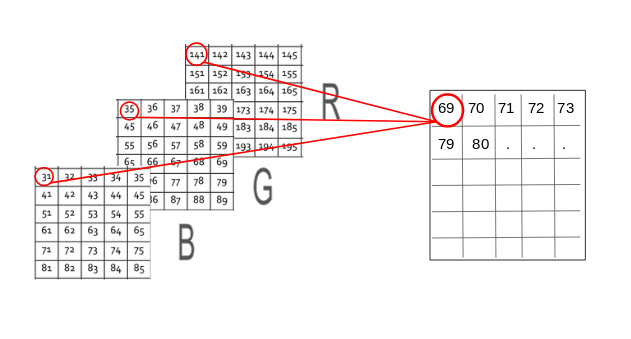

Taking the mean of the pixels in the BGR matrices to get one matrix

**Mean Pixel Value for all Dog images**

In [6]:
%%time

dog_mean_feature = []
for image in dog_images:
    
    # Create an empty feature matrix
    feature_matrix = np.zeros((size, size)) 
    
    # Iterate through the image matrices
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            feature_matrix[i][j] = ((int(image[i, j, 0]) + int(image[i, j, 1]) + int(image[i, j, 2]))/3)
    
    # Add to the mean features list
    dog_mean_feature.append(feature_matrix)

Wall time: 271 ms


In [7]:
print(len(dog_mean_feature))

95


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


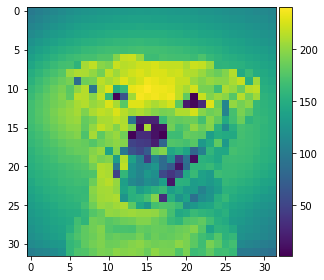

In [8]:
imshow(dog_mean_feature[30])

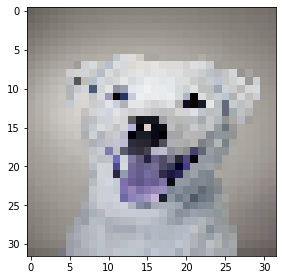

In [9]:
imshow(dog_images[30])

**Mean Pixel Values for all cat images**

In [10]:
%%time

cat_mean_feature = []
for image in cat_images:
    
    # Create an empty feature matrix
    feature_matrix = np.zeros((size, size)) 
    
    # Iterate through the image matrices
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            feature_matrix[i][j] = ((int(image[i, j, 0]) + int(image[i, j, 1]) + int(image[i, j, 2]))/3)
    
    # Add to the mean features list
    cat_mean_feature.append(feature_matrix)

Wall time: 239 ms


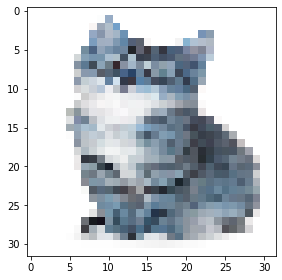

In [11]:
imshow(cat_images[3])

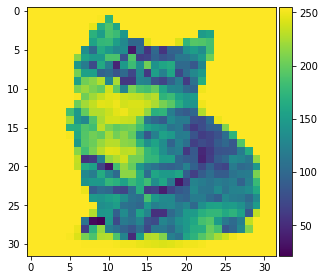

In [12]:
imshow(cat_mean_feature[3])

### Feature 2: Variance of the Pixel Values

**Variance Pixel Value for all Dog images**

In [13]:
%%time

dog_var_feature = []
for i, image in enumerate(dog_images):
    print("Image: ", i)
    # Create an empty feature matrix
    feature_matrix = np.zeros((size, size)) 
    
    # Iterate through the image matrices
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            feature_matrix[i][j] = np.var([int(image[i,j,0]), int(image[i,j,1]), int(image[i,j,2])])
    
    # Add to the var features list
    dog_var_feature.append(feature_matrix)

Image:  0
Image:  1
Image:  2
Image:  3
Image:  4
Image:  5
Image:  6
Image:  7
Image:  8
Image:  9
Image:  10
Image:  11
Image:  12
Image:  13
Image:  14
Image:  15
Image:  16
Image:  17
Image:  18
Image:  19
Image:  20
Image:  21
Image:  22
Image:  23
Image:  24
Image:  25
Image:  26
Image:  27
Image:  28
Image:  29
Image:  30
Image:  31
Image:  32
Image:  33
Image:  34
Image:  35
Image:  36
Image:  37
Image:  38
Image:  39
Image:  40
Image:  41
Image:  42
Image:  43
Image:  44
Image:  45
Image:  46
Image:  47
Image:  48
Image:  49
Image:  50
Image:  51
Image:  52
Image:  53
Image:  54
Image:  55
Image:  56
Image:  57
Image:  58
Image:  59
Image:  60
Image:  61
Image:  62
Image:  63
Image:  64
Image:  65
Image:  66
Image:  67
Image:  68
Image:  69
Image:  70
Image:  71
Image:  72
Image:  73
Image:  74
Image:  75
Image:  76
Image:  77
Image:  78
Image:  79
Image:  80
Image:  81
Image:  82
Image:  83
Image:  84
Image:  85
Image:  86
Image:  87
Image:  88
Image:  89
Image:  90
Image:  9

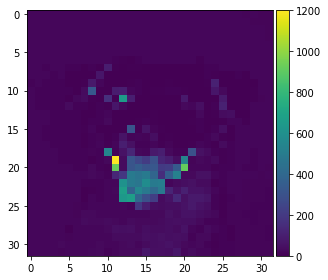

In [14]:
imshow(dog_var_feature[30])

**Variance of Pixel Values for all cat images**

In [15]:
%%time

cat_var_feature = []
for i, image in enumerate(cat_images):
    print("Image: ", i)
    # Create an empty feature matrix
    feature_matrix = np.zeros((size, size)) 
    
    # Iterate through the image matrices
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            feature_matrix[i][j] = np.var([int(image[i,j,0]), int(image[i,j,1]), int(image[i,j,2])])
    
    # Add to the variance features list
    cat_var_feature.append(feature_matrix)

Image:  0
Image:  1
Image:  2
Image:  3
Image:  4
Image:  5
Image:  6
Image:  7
Image:  8
Image:  9
Image:  10
Image:  11
Image:  12
Image:  13
Image:  14
Image:  15
Image:  16
Image:  17
Image:  18
Image:  19
Image:  20
Image:  21
Image:  22
Image:  23
Image:  24
Image:  25
Image:  26
Image:  27
Image:  28
Image:  29
Image:  30
Image:  31
Image:  32
Image:  33
Image:  34
Image:  35
Image:  36
Image:  37
Image:  38
Image:  39
Image:  40
Image:  41
Image:  42
Image:  43
Image:  44
Image:  45
Image:  46
Image:  47
Image:  48
Image:  49
Image:  50
Image:  51
Image:  52
Image:  53
Image:  54
Image:  55
Image:  56
Image:  57
Image:  58
Image:  59
Image:  60
Image:  61
Image:  62
Image:  63
Image:  64
Image:  65
Image:  66
Image:  67
Image:  68
Image:  69
Image:  70
Image:  71
Image:  72
Image:  73
Image:  74
Image:  75
Image:  76
Image:  77
Image:  78
Image:  79
Image:  80
Image:  81
Image:  82
Image:  83
Image:  84
Image:  85
Image:  86
Image:  87
Image:  88
Image:  89
Image:  90
Image:  9

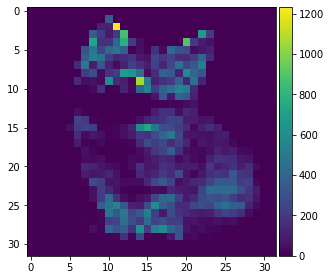

In [28]:
imshow(cat_var_feature[3])

## Preparing the dataset

I will flatten the image matrix and make a 2X32x32 row single vector for each cat and dog image. Here, the first 1096 entries will be the mean pixel values and the next 1096 will be the variance values.

In [38]:
# Flatten the matrices for both cats and dogs (mean and var)
flatten_feature_dog = []
flatten_feature_cat = []

for i in range(len(dog_images)):
    
    # Collect the flattened mean and variance lists
    dog_feature_mean = list(dog_mean_feature[i].flatten())
    cat_feature_mean = list(cat_mean_feature[i].flatten())
    
    dog_feature_var = list(dog_var_feature[i].flatten())
    cat_feature_var = list(cat_var_feature[i].flatten())
    
    # Get a combined list 
    flatten_feature_dog.append(dog_feature_mean + dog_feature_var)
    flatten_feature_cat.append(cat_feature_mean + cat_feature_var)
    print(f"Feature list shape for dog:{len(flatten_feature_dog[i])} and cat: {len(flatten_feature_cat[i])}")

print("Total entries:", len(flatten_feature_dog), len(flatten_feature_cat))

Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 and cat: 2048
Feature list shape for dog:2048 an

In [45]:
# Convert the features into a dataframe
dog_df = pd.DataFrame(flatten_feature_dog)
cat_df = pd.DataFrame(flatten_feature_dog)

# Add the class labels 
dog_df['class'] = 'dog'
cat_df['class'] = 'cat'

# Concatenate the dataset
final_df = pd.concat([dog_df, cat_df])

# shuffle the DataFrame rows 
final_df = final_df.sample(frac = 1) 
final_df.reset_index(drop=True, inplace=True)

# Display
final_df

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,180.666667,180.666667,181.666667,182.666667,183.000000,184.000000,184.000000,186.000000,187.000000,186.000000,...,1243.555556,849.555556,624.666667,610.888889,366.888889,21.555556,49.555556,37.555556,37.555556,dog
1,130.666667,180.333333,143.333333,181.666667,177.333333,172.333333,176.000000,168.333333,164.000000,179.000000,...,32.666667,337.555556,322.666667,193.555556,240.888889,216.222222,160.222222,112.888889,181.555556,dog
2,250.666667,249.666667,247.666667,246.666667,240.666667,215.666667,239.666667,248.000000,231.666667,228.666667,...,22.888889,48.666667,67.555556,66.666667,112.888889,74.888889,40.222222,28.222222,21.555556,cat
3,120.666667,116.666667,116.666667,117.000000,117.000000,117.666667,115.333333,114.666667,111.666667,108.333333,...,60.222222,269.555556,251.555556,172.666667,91.555556,80.888889,201.555556,172.666667,216.666667,dog
4,226.000000,225.000000,227.000000,229.000000,230.000000,231.000000,232.000000,232.000000,231.000000,233.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.000000,1.000000,1.000000,1.000000,1.666667,1.666667,1.333333,1.333333,1.666667,3.666667,...,80.888889,48.666667,8.666667,2.888889,0.666667,18.666667,4.222222,0.888889,0.000000,dog
186,156.000000,162.666667,174.666667,167.000000,205.333333,234.000000,206.333333,245.666667,229.666667,241.333333,...,8.000000,34.666667,42.888889,369.555556,488.000000,168.000000,43.555556,76.222222,42.000000,cat
187,247.666667,250.000000,253.000000,253.333333,253.333333,255.000000,255.000000,254.333333,254.333333,254.333333,...,0.666667,0.666667,0.666667,0.666667,0.666667,1.555556,0.888889,0.888889,0.888889,cat
188,207.333333,198.333333,193.333333,207.333333,214.000000,220.000000,216.333333,222.000000,224.333333,221.000000,...,10.888889,10.888889,10.666667,30.888889,32.666667,30.888889,49.555556,32.666667,27.555556,dog


In [49]:
# Save this dataframe 
# final_df.to_csv('../Datasets/final_data.csv')

### Create the test dataframe in the same manner

In [87]:
%%time

# Read all the dog images
imdir = '../Datasets/test_set/'
ext = ['png', 'jpg', 'gif', 'jpeg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

test_images = [cv2.imread(file) for file in files]
print("Number of Test Images Collected", len(test_images))

Number of Test Images Collected 20
Wall time: 1.55 s


In [54]:
%%time

# Resize the test images 
for i in range(len(test_images)):
    test_images[i] = cv2.resize(test_images[i], dsize=(size, size))

Wall time: 28 ms


In [55]:
%%time

test_mean_feature = []
for image in test_images:
    
    # Create an empty feature matrix
    feature_matrix = np.zeros((size, size)) 
    
    # Iterate through the image matrices
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            feature_matrix[i][j] = ((int(image[i, j, 0]) + int(image[i, j, 1]) + int(image[i, j, 2]))/3)
    
    # Add to the mean features list
    test_mean_feature.append(feature_matrix)

Wall time: 152 ms


In [56]:
# Variance Feature
test_var_feature = []
for i, image in enumerate(test_images):
    print("Image: ", i)
    # Create an empty feature matrix
    feature_matrix = np.zeros((size, size)) 
    
    # Iterate through the image matrices
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            feature_matrix[i][j] = np.var([int(image[i,j,0]), int(image[i,j,1]), int(image[i,j,2])])
    
    # Add to the var features list
    test_var_feature.append(feature_matrix)

Image:  0
Image:  1
Image:  2
Image:  3
Image:  4
Image:  5
Image:  6
Image:  7
Image:  8
Image:  9
Image:  10
Image:  11
Image:  12
Image:  13
Image:  14
Image:  15
Image:  16
Image:  17
Image:  18
Image:  19


In [59]:
# Flatten the matrices for test images and create a dataframe
flatten_feature_test = []

for i in range(len(test_images)):
    
    # Collect the flattened mean and variance lists
    test_feature_mean = list(test_mean_feature[i].flatten())
    
    test_feature_var = list(test_var_feature[i].flatten())
    
    # Get a combined list 
    flatten_feature_test.append(test_feature_mean + test_feature_var)
    print(f"Feature list shape for test images:{len(flatten_feature_test[i])}")

print("Total entries:", len(flatten_feature_test))

# Create the test dataframe
test_df = pd.DataFrame(flatten_feature_test)
test_df.shape

Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Feature list shape for test images:2048
Total entries: 20


(20, 2048)

In [114]:
# Save the test df
# test_df.to_csv('../Datasets/test_data.csv')

I added the class labels manually to the test dataset so now I have to load the test and the final data separately after preparation of the dataset. 

## Start Testing From here

In [5]:
final_df = pd.read_csv('../Datasets/final_data.csv', index_col=0)
test_df = pd.read_csv('../Datasets/test_data.csv', index_col=0)
final_df.shape, test_df.shape

((190, 2049), (20, 2049))

## Implement K-NN Classifier

In [6]:
# Function to calculate Euclidean distance between two rows
def get_distance(row1, row2):
    
    dist = 0.0
    # We don't need to calculate the distance for the last entry because that is the class
    for r in range(len(row1)-1):
        dist += (row1[r] - row2[r])**2
    
    return np.sqrt(dist)

In [7]:
# Function to get the nearest neighbours based on the eculidean distances that we calculcate
def get_class(train_data, test_row, k):
    
    # Store the distances for a train row and the train row as a tuple inside a list
    row_distances = list()
    
    for i in range(len(train_data)):
        row = train_data.iloc[i]
        
        # Calculate the distance
        distance = get_distance(row, test_row)
        
        # Add to the list of distances 
        row_distances.append((row, distance))
        
    # Sort the list based on the distance values
    row_distances.sort(key=lambda x: x[1])
    
    # Select the top k neighbours 
    nearest = []
    for i in range(k):
        nearest.append(row_distances[i][0])
    
    # Convert to dataframe again
    nearest = pd.DataFrame(nearest)
    
    # Collect the most frequent class. If there are equally occuring classes then select 0
    if len(nearest['class'].mode()) > 1:
        return 0
    else:
        return int(nearest['class'].mode()[0])
    

In [8]:
def knnClassifier(train_data, X_test, k):
    
    predictions = list()
    
    # Loop through each test_row and get the prediction 
    for val in range(len(X_test)):
        row = X_test.iloc[val]
        pred = get_class(train_data, row, k=k)

        # Add to the predictions list 
        predictions.append(pred)
    
    return np.array(predictions)
    

In [9]:
def accuracy(true_values, predictions):
    accuracy = (true_values == predictions).mean()
    return accuracy

In [10]:
# Convert the class labels to binary values 1 - dog and 0 - cat
final_df['class'] = final_df['class'].map( {"cat":0, "dog":1} )
test_df['class'] = test_df['class'].map( {"cat":0, "dog":1} )
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,180.666667,180.666667,181.666667,182.666667,183.000000,184.000000,184.000000,186.000000,187.000000,186.000000,...,1243.555556,849.555556,624.666667,610.888889,366.888889,21.555556,49.555556,37.555556,37.555556,1
1,130.666667,180.333333,143.333333,181.666667,177.333333,172.333333,176.000000,168.333333,164.000000,179.000000,...,32.666667,337.555556,322.666667,193.555556,240.888889,216.222222,160.222222,112.888889,181.555556,1
2,250.666667,249.666667,247.666667,246.666667,240.666667,215.666667,239.666667,248.000000,231.666667,228.666667,...,22.888889,48.666667,67.555556,66.666667,112.888889,74.888889,40.222222,28.222222,21.555556,0
3,120.666667,116.666667,116.666667,117.000000,117.000000,117.666667,115.333333,114.666667,111.666667,108.333333,...,60.222222,269.555556,251.555556,172.666667,91.555556,80.888889,201.555556,172.666667,216.666667,1
4,226.000000,225.000000,227.000000,229.000000,230.000000,231.000000,232.000000,232.000000,231.000000,233.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [11]:
X_train = final_df.drop(['class'], axis=1)
y_train = final_df['class']

X_test = test_df.drop(['class'], axis=1)
y_test = test_df['class']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((190, 2048), (190,), (20, 2048), (20,))

### Testing

I have used two testing methods - 1. Cross Validation 2. Train-Test Split. I will test using both of them to see what accuracy I get. Cross validation will let me know which k value is the best but for train test split, I will test using all k values. 

**Cross Validation**

In [25]:
def cross_validation(train_data, r, k):
    
    # Calculate the size of each fold 
    total_rows = train_data.shape[0]
    fold_size = total_rows//r
    
    # Randomly sample the data
    train_data = train_data.sample(frac=1).reset_index(drop=True)
    
    # Collect all folds in a list
    divided_data = list()
    indices = [i for i in range(0, len(train_data)+1, fold_size)]
    print("The breakup of the data in indices is: ", indices)
    
    for i in range(len(indices)-1):
        filter_data = train_data[indices[i]:indices[i+1]]
        divided_data.append(filter_data)
    
    scores = []
    # Perform cross validation for the whole data 
    for data in divided_data:
        test = data
        train = train_data[~train_data.index.isin(test.index)]
        train.reset_index(drop=True, inplace=True)
        
        # Get the X_train and y_train
        test_X = test.drop(['class'], axis=1)
        test_y = test['class']
        
        # Get predictions
        preds = knnClassifier(train_data, test_X, k)
        acc_score = accuracy(test_y, preds)
        scores.append(acc_score)
    
    # Get average accuracy 
    return np.array(scores).mean()
        

Had to pause because of the time consuming nature of the code. 

In [27]:
# # Test cross validation
# for k_val in range(1, 20):
#     sc = cross_validation(final_df, r=2, k=k_val)
#     print("k=%d, accuracy=%.2f%%" % (k_val, sc * 100))

**Method 2:** This is where I have tested the test data for all the k values.

In [79]:
%%time 

# test the classifier 
k_start = 1
k_end = 20
k_scores = []

for k_value in range(k_start, k_end+1):
    preds = knnClassifier(final_df, X_test, k=k_value)
    acc_score = accuracy(y_test, preds)
    k_scores.append(acc_score)
    print("k=%d, accuracy=%.2f%%" % (k_value, acc_score * 100))

k=1, accuracy=45.00%
k=2, accuracy=50.00%
k=3, accuracy=60.00%
k=4, accuracy=50.00%
k=5, accuracy=40.00%
k=6, accuracy=50.00%
k=7, accuracy=50.00%
k=8, accuracy=50.00%
k=9, accuracy=45.00%
k=10, accuracy=50.00%
k=11, accuracy=40.00%
k=12, accuracy=50.00%
k=13, accuracy=65.00%
k=14, accuracy=50.00%
k=15, accuracy=60.00%
k=16, accuracy=50.00%
k=17, accuracy=50.00%
k=18, accuracy=50.00%
k=19, accuracy=60.00%
k=20, accuracy=50.00%
Wall time: 28min 6s


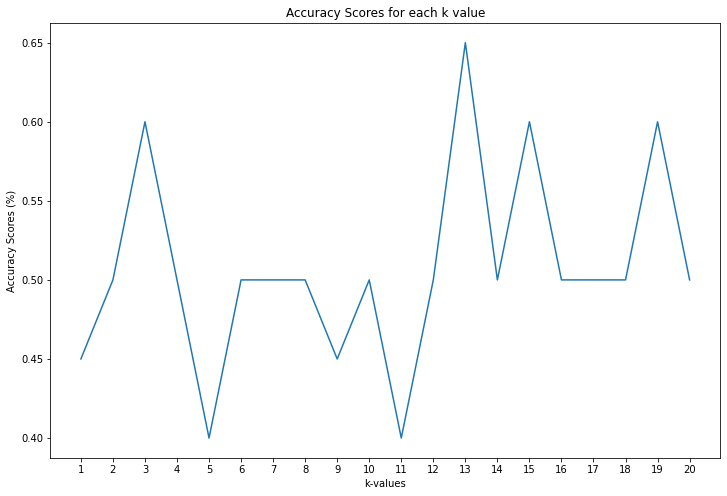

In [83]:
# Plot the k score values
x = [i for i in range(1, 21)]
y = k_scores

plt.figure(figsize=(12, 8))
plt.title("Accuracy Scores for each k value")
plt.xlabel("k-values")
plt.ylabel("Accuracy Scores (%)")
plt.xticks(x)
plt.plot(x, y)
plt.show()